In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Bubble Map**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import cartopy 
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
import shapefile as shp
sns.set_style('whitegrid')

In [ ]:
fp = r'/content/india-polygon.shp'
map_df = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


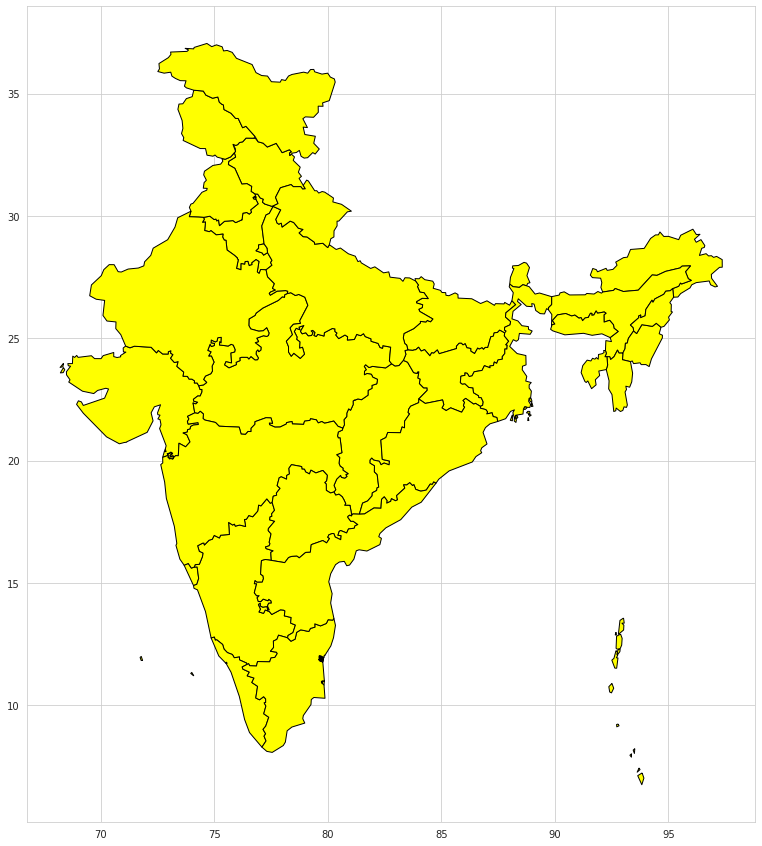

In [ ]:
map_df.plot(figsize=(15,15),color='yellow',edgecolor='k')
plt.show()

In [ ]:
data = pd.read_csv("/content/India_capitals.csv") #data of 2023 prepared on my own from google
data

,capital,lattitude,longitude,state,population
0,Vishakhapatnam,17.6868,83.2185,Andhra Pradesh,2331000
1,Itanagar,27.0844,93.6053,Arunachal Pradesh,81000
2,Dispur,26.1433,91.7898,Assam,706031
3,Patna,25.5941,85.1376,Bihar,2580000
4,Chandigarh,30.7333,76.7794,Chandigarh,1215000
5,Raipur,21.2514,81.6296,Chhattisgarh,1392000
6,New Delhi,28.6139,77.2090,Delhi,15217000
7,Panaji,15.4909,73.8278,Goa,157000
8,Gandhinagar,23.2156,72.6369,Gujarat,284000
9,Shimla,31.1048,77.1734,Himachal Pradesh,232000


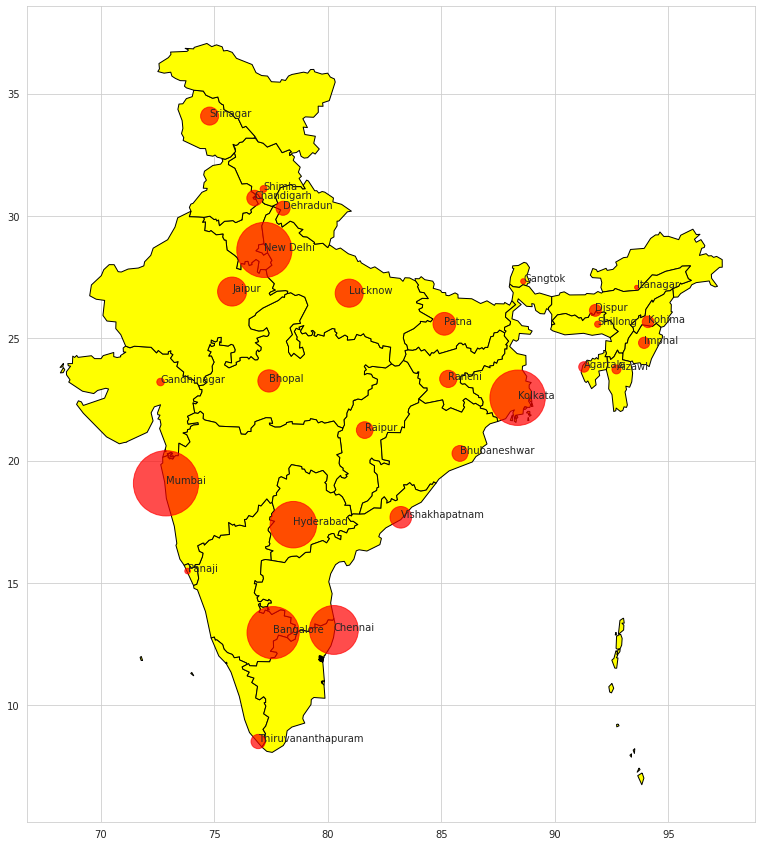

In [ ]:
map_df.plot(figsize=(15,15),color='yellow',edgecolor='k')

for capital in range(len(data)):
  plt.text(data["longitude"][capital], data["lattitude"][capital], data["capital"][capital])
plt.scatter(data["longitude"], data["lattitude"],s = data["population"]/5000,color = 'red', alpha = 0.7)  
# plt.plot(data["longitude"], data["lattitude"], "o", markersize=data["population"]/5000, color='red', alpha=0.7)

# **Connection graph of GoAir domestic flights**

In [ ]:
data2 = pd.read_csv("/content/Flightscheduledata.csv")
data2

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight,Effective From,EffectiveTo
0,Abu Dhabi,Ahmedabad,G8 76,21:40,18:15,19:05,Via DEL,F,G8 717,02/12/2023,02/14/2023
1,Abu Dhabi,Bagdogra,G8 76,21:40,08:25,09:15,Via DEL,Daily,G8 263,02/12/2023,02/14/2023
2,Abu Dhabi,Bangkok,G8 76,21:40,13:00,12:20,Via DEL,Daily,G8 37,02/12/2023,03/24/2023
3,Abu Dhabi,Bengaluru,G8 76,21:40,08:35,09:25,Via DEL,Daily,G8 113,02/12/2023,02/14/2023
4,Abu Dhabi,Delhi,G8 76,21:40,02:40,03:30,Non Stop,Daily,-,02/12/2023,03/25/2023
...,...,...,...,...,...,...,...,...,...,...,...
2086,Varanasi,Pune,G8 404,12:30,17:55,05:25,Via BLR,Sa,G8 241,02/12/2023,02/17/2023
2087,Varanasi,Pune,G8 404,12:30,17:55,05:25,Via BLR,"M,Tu,W,Th,F,Su",G8 241,02/12/2023,03/03/2023
2088,Varanasi,Pune,G8 768,21:00,06:15,09:15,Via AMD,"M,Tu,Th,F,Sa,Su",G8 715,02/12/2023,03/24/2023
2089,Varanasi,Ranchi,G8 382,11:15,19:25,08:10,Via BOM,Su,G8 387,02/12/2023,02/15/2023


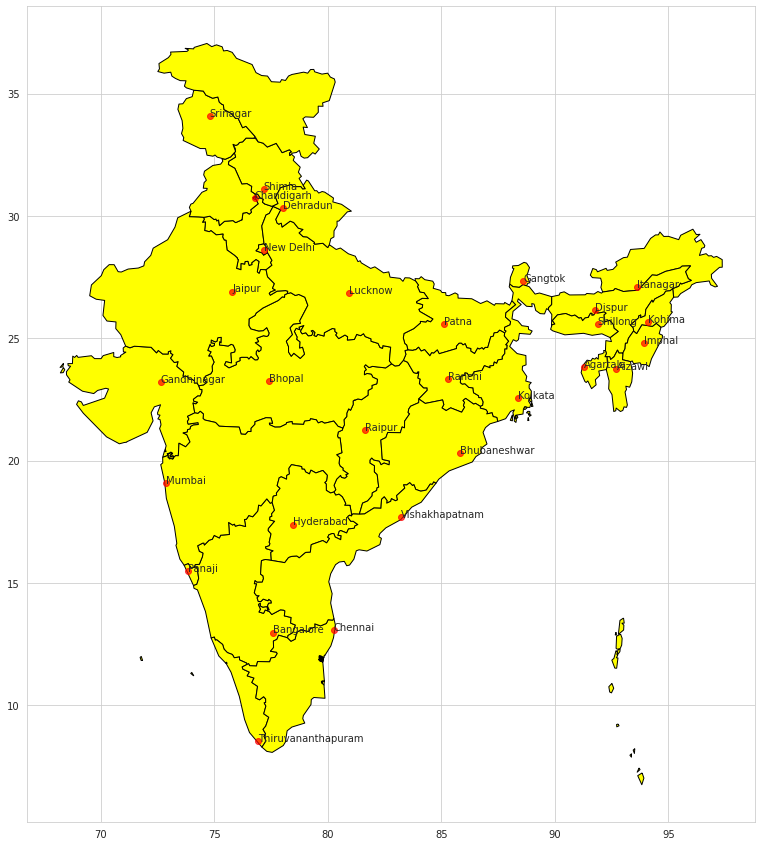

In [ ]:
map_df.plot(figsize=(15,15),color='yellow',edgecolor='k')

for capital in range(len(data)):
  plt.text(data["longitude"][capital], data["lattitude"][capital], data["capital"][capital])
plt.scatter(data["longitude"], data["lattitude"],color = 'red', alpha = 0.7)  

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")

# Connection graph including foreign destinations and origin

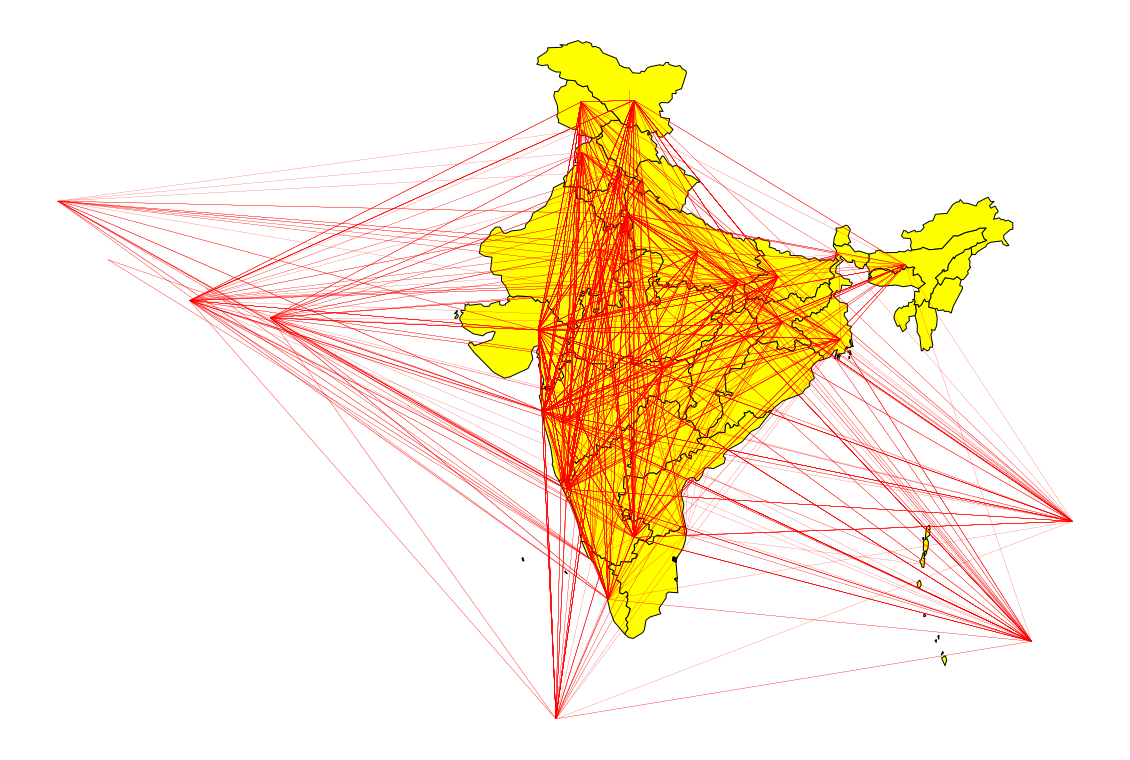

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.axis('off')
map_df.plot(ax=ax, color = "yellow", edgecolor="k")
for i in range(len(data2)):
  plt.text(data2["longitude"][i], data2["lattitude"][i], data2["Origin"][i])
  plt.text(data2["longitude"][i], data2["lattitude"][i], data2["Destination"][i])
for i in range(len(data2)):
  origin = geolocator.geocode(data2['Origin'][i])
  dest = geolocator.geocode(data2['Destination'][i])
  ax.plot(origin.longitude,origin.latitude,color = "red")
  ax.plot(dest.longitude,dest.latitude,color = "red")
  ax.plot([origin.longitude,dest.longitude],[origin.latitude,dest.latitude],linewidth = 0.2, color = "red")

# Data excluding foreign destinations and origin

In [ ]:
data2 = pd.read_csv("/content/Flightscheduledata.csv")
data2

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight,Effective From,EffectiveTo
0,Abu Dhabi,Ahmedabad,G8 76,21:40,18:15,19:05,Via DEL,F,G8 717,02/12/2023,02/14/2023
1,Abu Dhabi,Bagdogra,G8 76,21:40,08:25,09:15,Via DEL,Daily,G8 263,02/12/2023,02/14/2023
2,Abu Dhabi,Bangkok,G8 76,21:40,13:00,12:20,Via DEL,Daily,G8 37,02/12/2023,03/24/2023
3,Abu Dhabi,Bengaluru,G8 76,21:40,08:35,09:25,Via DEL,Daily,G8 113,02/12/2023,02/14/2023
4,Abu Dhabi,Delhi,G8 76,21:40,02:40,03:30,Non Stop,Daily,-,02/12/2023,03/25/2023
...,...,...,...,...,...,...,...,...,...,...,...
2086,Varanasi,Pune,G8 404,12:30,17:55,05:25,Via BLR,Sa,G8 241,02/12/2023,02/17/2023
2087,Varanasi,Pune,G8 404,12:30,17:55,05:25,Via BLR,"M,Tu,W,Th,F,Su",G8 241,02/12/2023,03/03/2023
2088,Varanasi,Pune,G8 768,21:00,06:15,09:15,Via AMD,"M,Tu,Th,F,Sa,Su",G8 715,02/12/2023,03/24/2023
2089,Varanasi,Ranchi,G8 382,11:15,19:25,08:10,Via BOM,Su,G8 387,02/12/2023,02/15/2023


In [ ]:
data2.shape

(2091, 11)

In [ ]:
data2.drop(data2[data2['Origin']=="Abu Dhabi"].index, inplace = True)
data2.drop(data2[data2['Destination']=="Abu Dhabi"].index, inplace = True)

data2.drop(data2[data2['Origin']=="Phuket"].index, inplace = True)
data2.drop(data2[data2['Destination']=="Phuket"].index, inplace = True)

data2.drop(data2[data2['Origin']=="Male"].index, inplace = True)
data2.drop(data2[data2['Destination']=="Male"].index, inplace = True)

data2.drop(data2[data2['Origin']=="Muscat"].index, inplace = True)
data2.drop(data2[data2['Destination']=="Muscat"].index, inplace = True)

data2.drop(data2[data2['Origin']=="Kuwait"].index, inplace = True)
data2.drop(data2[data2['Destination']=="Kuwait"].index, inplace = True)

data2.drop(data2[data2['Origin']=="Bangkok"].index, inplace = True)
data2.drop(data2[data2['Destination']=="Bangkok"].index, inplace = True)

data2.drop(data2[data2['Origin']=="Dubai"].index, inplace = True)
data2.drop(data2[data2['Destination']=="Dubai"].index, inplace = True)

data2.drop(data2[data2['Origin']=="Dammam"].index, inplace = True)
data2.drop(data2[data2['Destination']=="Dammam"].index, inplace = True)
# data2.head()

In [ ]:
data2.shape

(1655, 11)

In [ ]:
data2

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight,Effective From,EffectiveTo
31,Ahmedabad,Amritsar,G8 413,21:10,08:25,11:15,Via BOM,"M,W,Th,F,Sa,Su",G8 2411,02/12/2023,02/14/2023
32,Ahmedabad,Amritsar,G8 413,21:10,08:20,11:10,Via BOM,Tu,G8 2411,02/12/2023,02/14/2023
33,Ahmedabad,Amritsar,G8 537,20:10,08:20,12:10,Via BOM,Tu,G8 2411,02/12/2023,02/14/2023
34,Ahmedabad,Amritsar,G8 537,20:10,08:25,12:15,Via BOM,"M,W,Th,F,Sa,Su",G8 2411,02/12/2023,02/14/2023
35,Ahmedabad,Amritsar,G8 244,07:05,20:35,13:30,Via BOM,Su,G8 2417,02/12/2023,02/15/2023
...,...,...,...,...,...,...,...,...,...,...,...
2086,Varanasi,Pune,G8 404,12:30,17:55,05:25,Via BLR,Sa,G8 241,02/12/2023,02/17/2023
2087,Varanasi,Pune,G8 404,12:30,17:55,05:25,Via BLR,"M,Tu,W,Th,F,Su",G8 241,02/12/2023,03/03/2023
2088,Varanasi,Pune,G8 768,21:00,06:15,09:15,Via AMD,"M,Tu,Th,F,Sa,Su",G8 715,02/12/2023,03/24/2023
2089,Varanasi,Ranchi,G8 382,11:15,19:25,08:10,Via BOM,Su,G8 387,02/12/2023,02/15/2023
